## Telecom Customer Churn Prediction
This notebook is based on <a href="https://www.coursera.org/learn/telecom-customer-churn-prediction">Telecom Customers Churn Predictions</a> case-study with additional visualizations, explorations, and optimizations from my side. <br>

### Objective
Telecom service providers use customer attrition analysis as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Machine Learning algorithms help companies analyze customer attrition rated based on several factors which includes verious services subscribed by the customers, tenure rate, gender, senior citizen, payment method, and many more. 

### Table of contents
1. Import libraries
2. Exploratory Data Analysis (EDA) <br>
&emsp;2.1 Getting to Know the Dataset <br>
&emsp;2.2 Data Visualization <br>
&emsp;&emsp;&emsp;2.2.1 Overall Distributions <br>
&emsp;&emsp;&emsp;2.2.2 Target Distribution <br>
&emsp;&emsp;&emsp;2.2.3 Correlation Matrix & Aesthetics<br>
&emsp;&emsp;&emsp;2.2.4 Answering the Questions <br>
&emsp;2.3 RandomForestClassifier's Feature Importance <br>
&emsp;2.4 PCA <br>
3. Data Preprocessing








4. Data Preparation
5. Train and Evaluate a Logistic Regression model
6. Train and Evaluate a Support Vector Machine Model
7. Train and Evaluate a Random Forest Classifier model
8. Train and Evaluate a K-Nearest Neighbor model
9. Train and Evaluate a Naive Bayes Classifier model
10. Compare the trained models by calculating AUC score and plot ROC curve


### Target
In our case, the target variable is the last column, class, which shows whether the customer was retained.
- 0 - corresponds to the client being retained
- 1 - corresponds to the client's leaving

## STEP 1: Import libraries

In [60]:
# import the essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the algorithms that will be used 
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

# import the supporting packages 
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve

# import additional packages for visualization
import plotly.express as px # interactive data visualization
import plotly.graph_objects as go
import cufflinks as cf # works as a connector between the pandas library and plotly
cf.go_offline()

# set the themes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# !pip install cufflinks    # uncomment in case it's not downloaded yet

# set inline visuals
%matplotlib inline 

## Step 2: Exploratory Data Analysis (EDA)

### 2.1 Getting to Know the Dataset
In this section, we will read the csv file, check the dimensions and missing values, and look into the structure. As we see below, this dataset consists of 20 feature and 1 target columns. Is there a correlation between states people leave in and phone provider switch? Do international calls cause such outcome? Do quitters spend more on phone plans? Do people need bigger day or evening plans? How much time do discontinued people spend talking on the phone throughout the day? <br>
Answers to the aforementioned questions are at the end of this section.


In [40]:
telecom_df = pd.read_csv('datasets/telecom_churn.csv')           # read the csv file
print(f'Dataset\'s dimensions: {telecom_df.shape}')              # check the dimensions
print(f'Any missing values? {np.any(telecom_df.isna().sum())}')  # check whether they're any missing values
print(f'Columns: {", ".join(telecom_df.columns.to_list())}')     # get the column names

Dataset's dimensions: (5000, 21)
Any missing values? False
Columns: state, account_length, area_code, phone_number, international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls, class


In [30]:
# check first rows
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [33]:
# check the statistical summary 
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### 2.2 Data Visualization
As we see above, first look at the dataset hasn't revealed any abnormalities. In order to make sure that everything is indeed alright, we need to further visualize it.
<b>Data Visualization</b> is the crucial part that needs the most attention. We cannot jump to model instantiation and outcomes without this step.

#### 2.2.1 Overall distributions
This section includes some basic distribution visualizations. 

c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



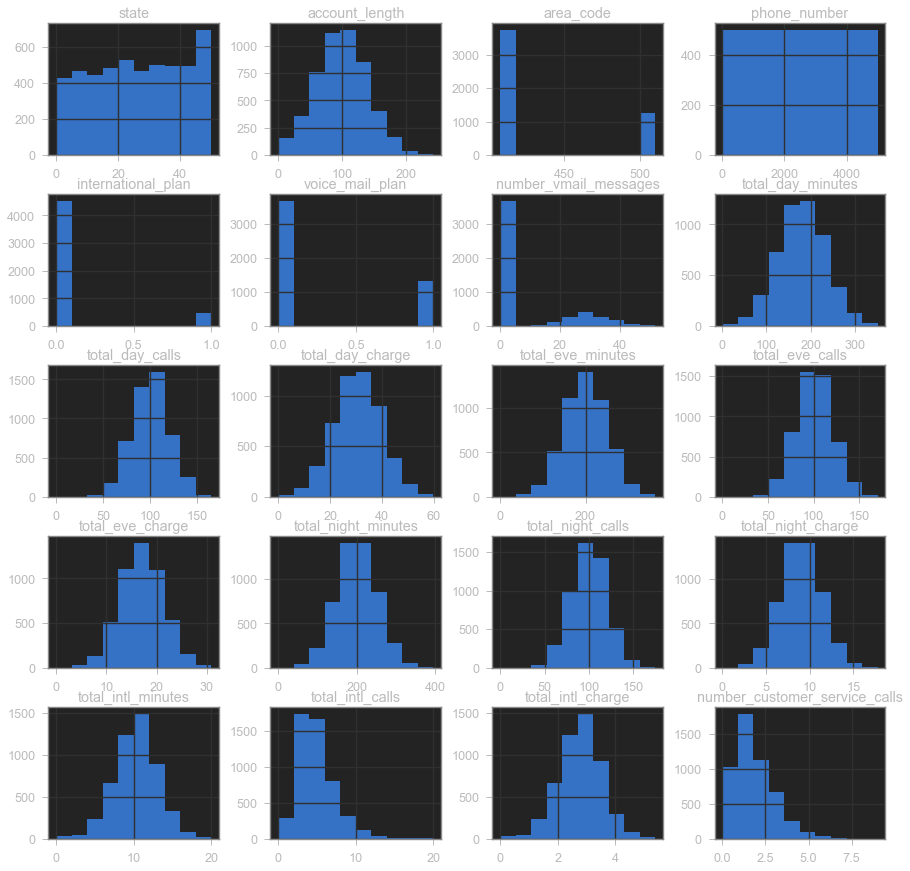

In [53]:
# 1. visualize the distribution of the whole dataset
telecom_df.drop('class', axis=1).hist(figsize=(15, 15))
plt.show()

#### 2.2.2 Target Distriubtion

In [45]:
# plot pie chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

# prepare the values to plot
labels = ['Stayed (0)', 'Left (1)']                    # create the variables to plot 
values = telecom_df['class'].value_counts().to_list()  # get their distribution

# create a donut-shaped representation
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Target: Customer segmentation', width=500, height=400)
fig.show()

#### 2.2.3 Correlation Matrix & Aesthetics


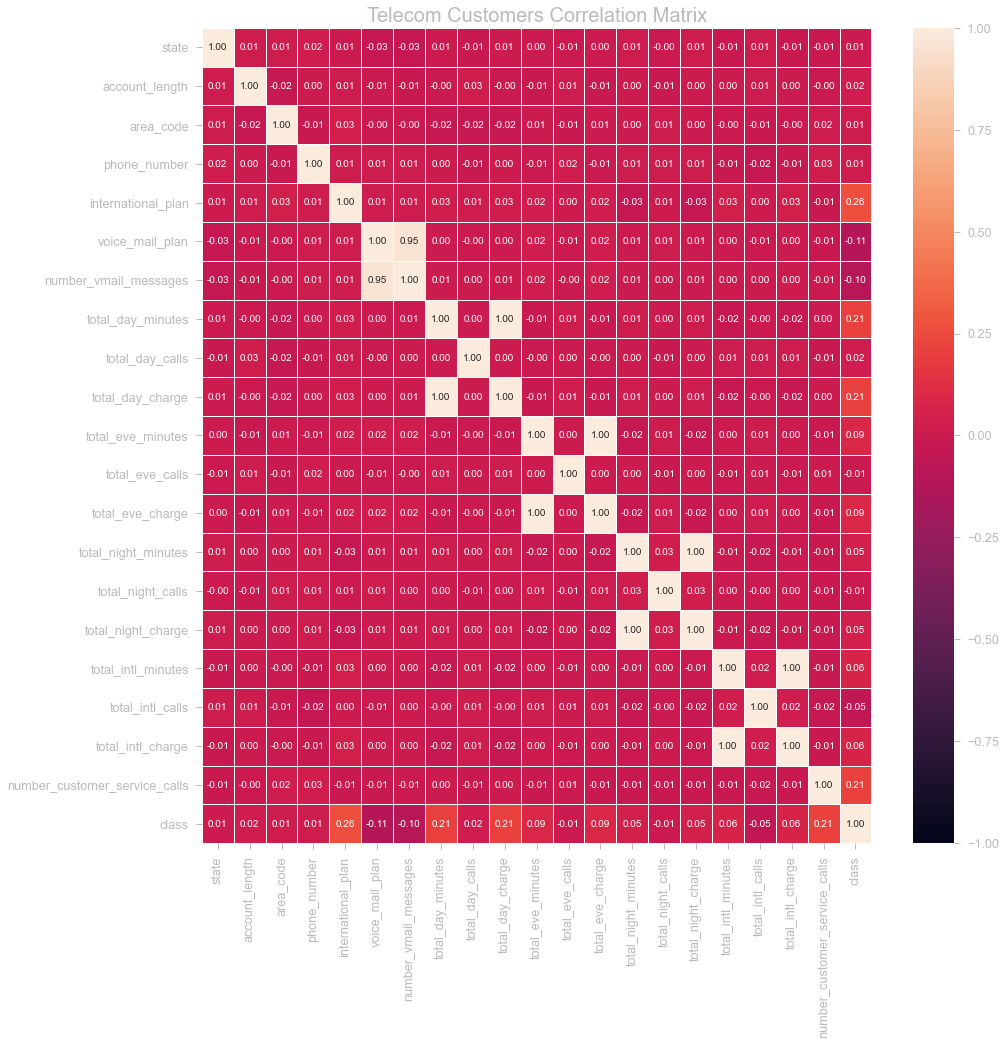

In [59]:
# general correlation matrix
corr_matrix = telecom_df.corr()                                  # create the correlation matrix                       
plt.figure(figsize=(15, 15))                                     # instantiate the figure size
sns.heatmap(corr_matrix, vmin=-1, vmax=1,                        # create a heatmap with the precision of two decimal places
            linewidths=.5, annot=True, fmt='.2f')
plt.title('Telecom Customers Correlation Matrix', fontsize=20)   # create the title
plt.show()                                                       # show the results

#### Aesthetics 

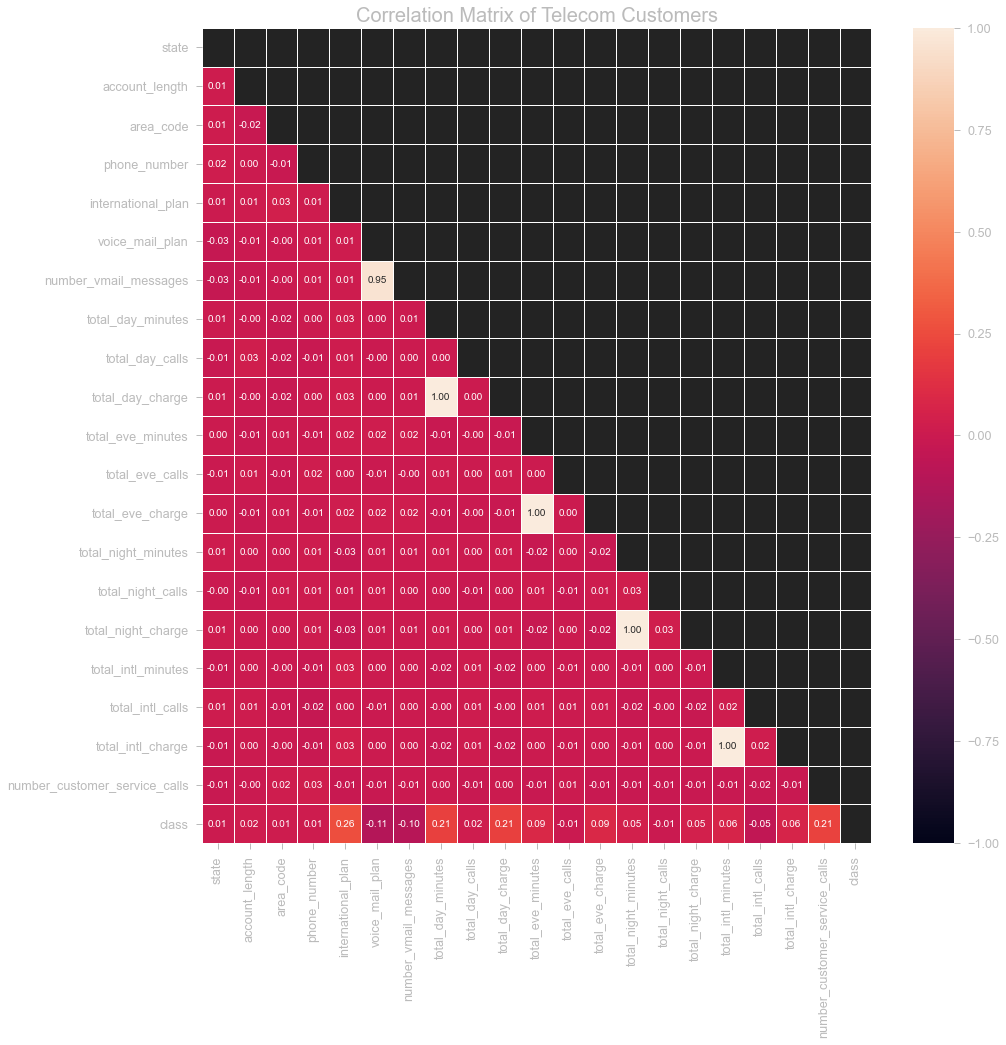

In [54]:
# Triangular Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=np.triu(corr_matrix), vmin=-1, vmax=1, linewidths=.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Telecom Customers', fontsize=20)
plt.show()

#### Another approach
To be honest, I find correlation matrices hard to read. Thus, another technique will be introduced to show the correlation between target and features. This approach shows a column-wise correlations in the descending order. The only flaw of the following instantiation is lack of overall feature-to-feature correlation. Nonetheless, it shows which columns contribute the most the desired outcome column. 

*<i>The reason why it starts from the second value is simply due to the first value being the class itself</i>. 

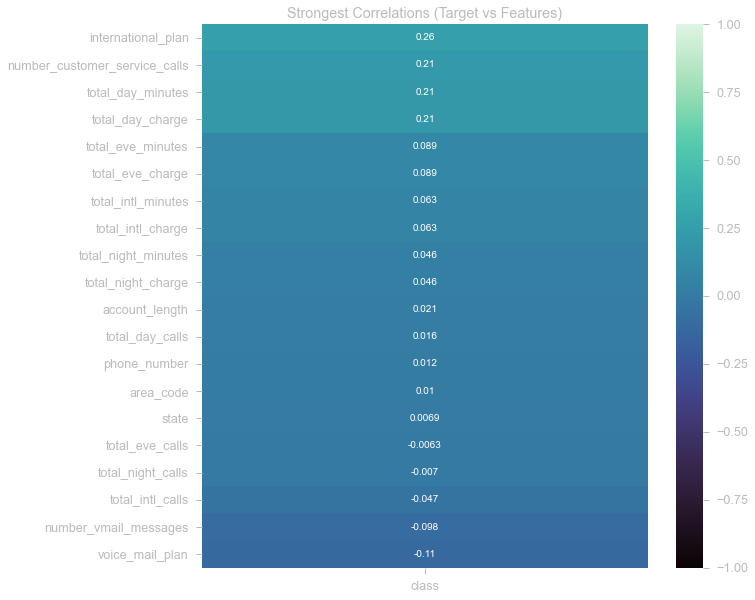

In [58]:
# sorted column representation
plt.figure(figsize=(10, 10))
plt.title('Strongest Correlations (Target vs Features)')
sns.heatmap(telecom_df.corr()[['class']].sort_values(by='class', ascending=False)[1:], 
            annot=True, vmin=-1, vmax=1, cmap='mako')
plt.show()

#### 2.2.4 Answering the questions

- Is there a correlation between states people leave in and phone provider switch? 

- Do international calls cause such outcome? 

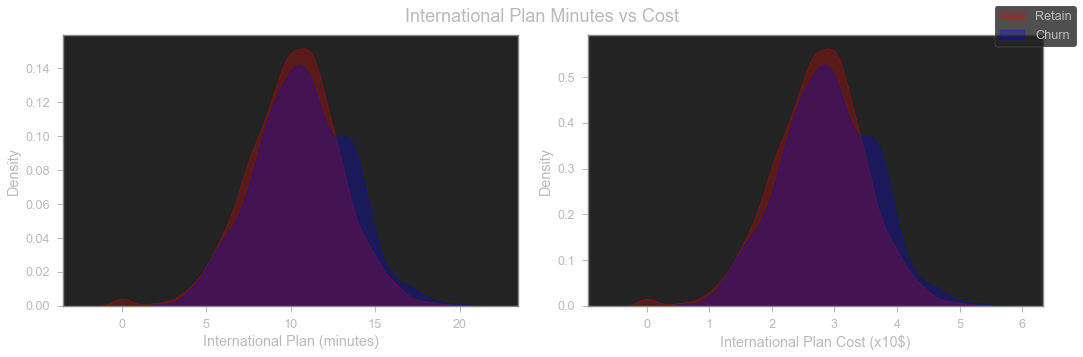

In [85]:
def get_kde_results(df, column1, xlabel1, 
                        column2, xlabel2):
    """
    
    """
    retained, quitted = 0, 1
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5); fig.set_figwidth(15)
    fig.tight_layout(pad=3.0)
    fig.suptitle('International Plan Minutes vs Cost', fontsize=18)
    
    sns.kdeplot(df[column1][(df['class'] == retained)], 
                     color='Red', shade=True, ax=ax1)
    sns.kdeplot(df[column1][(df['class'] == quitted)], 
                     color='Blue', shade=True, ax=ax1)
    
    sns.kdeplot(df[column2][(df['class'] == retained)], 
                     color='Red', shade=True, ax=ax2)
    sns.kdeplot(df[column2][(df['class'] == quitted)], 
                     color='Blue', shade=True, ax=ax2)
    
    fig.legend(['Retain', 'Churn'], loc='upper right')
    ax1.set_ylabel('Density')
    ax1.set_xlabel(xlabel1)
    
    ax2.set_ylabel('Density')
    ax2.set_xlabel(xlabel2)
    plt.show()


# Do international calls cause such outcome?
get_kde_results(telecom_df, 'total_intl_minutes', 'International Plan (minutes)',
                            'total_intl_charge', 'International Plan Cost (x10$)')

- Do people need bigger day or evening plans? 


- Do quitters spend more on phone plans?

- How much time do discontinued people spend talking on the phone throughout the day?